  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Police_Force  \
0  200501BS00001               525680.0                178240.0             1   
1  200501BS00002               524170.0                181650.0             1   
2  200501BS00003               524520.0                182240.0             1   
3  200501BS00004               526900.0                177530.0             1   
4  200501BS00005               528060.0                179040.0             1   

   Accident_Severity  Number_of_Vehicles  Number_of_Casualties      Date  \
0                  2                   1                     1  04/01/05   
1                  3                   1                     1  05/01/05   
2                  3                   2                     1  06/01/05   
3                  3                   1                     1  07/01/05   
4                  3                   1                     1  10/01/05   

   Day_of_Week   Time  ...  Road_Type  Speed_limit  Junc

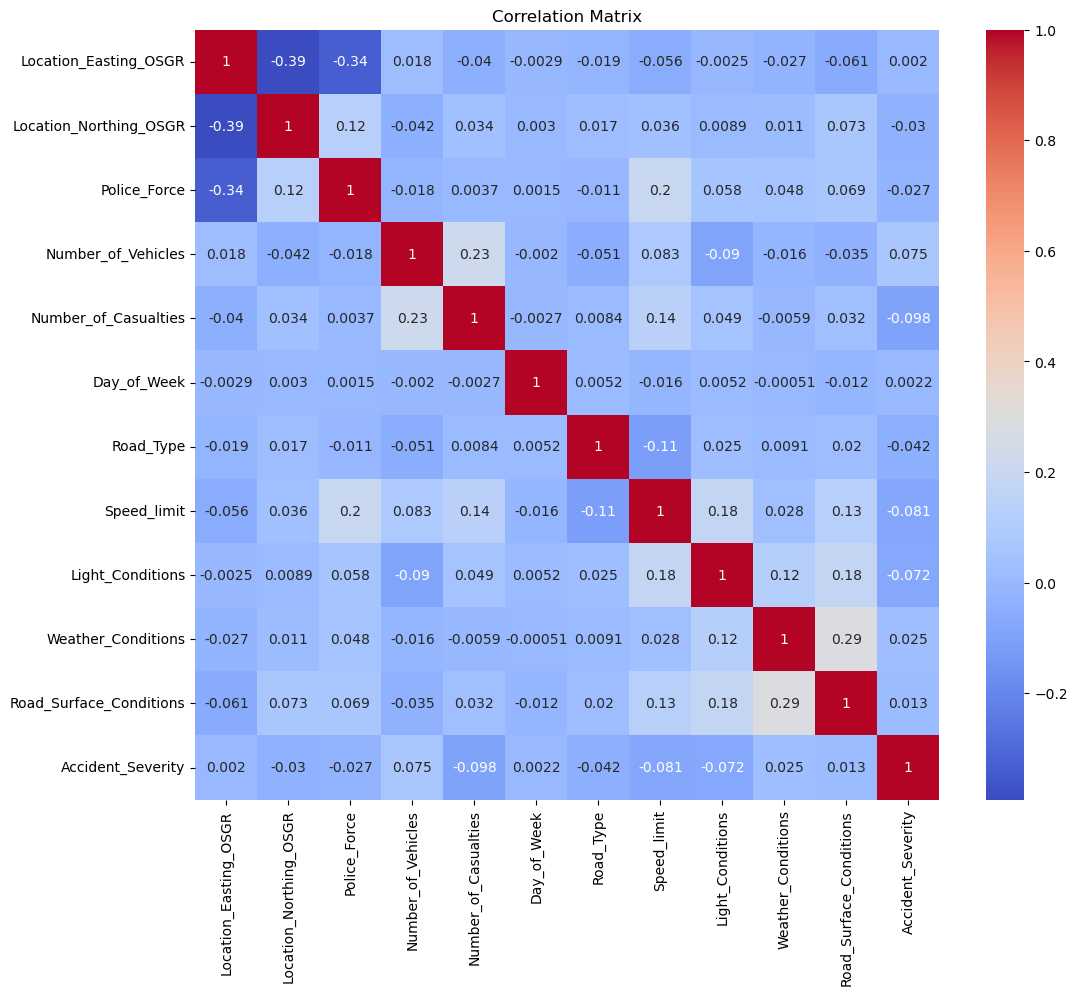

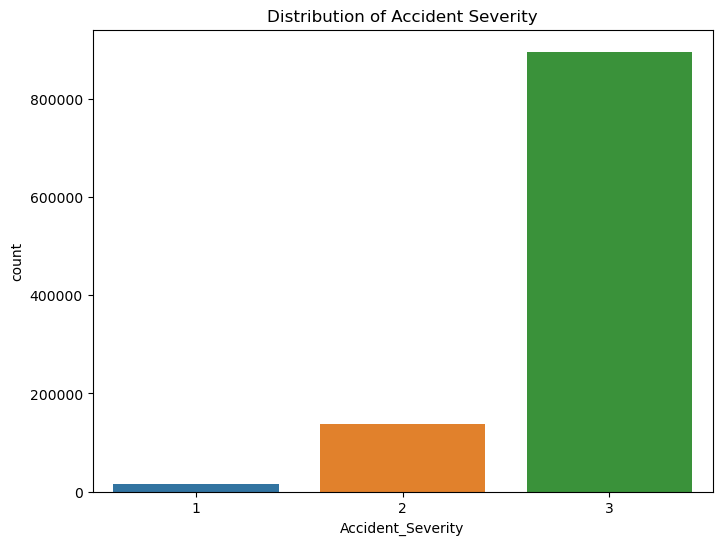

KeyboardInterrupt: 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /Accidents0514.csv')

# Display the first few rows of the dataset
print(data.head())

# Check the actual column names in your dataset
print(data.columns)

# Adjust numerical_features based on actual column names
numerical_features = ['Location_Easting_OSGR', 'Location_Northing_OSGR']

# Handle missing values for numerical features
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Adjust categorical_features based on actual column names
categorical_features = ['LSOA_of_Accident_Location']  # Update this based on your dataset

# Check if the categorical column exists in the dataset
if 'LSOA_of_Accident_Location' in data.columns:
    data[categorical_features] = data[categorical_features].fillna('Unknown')
else:
    print("Column 'LSOA_of_Accident_Location' not found in the dataset.")

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Day_of_Week', 'Road_Type', 'Speed_limit', 'Light_Conditions',
                       'Weather_Conditions', 'Road_Surface_Conditions']  # Update this based on your dataset

# Check if each categorical column exists in the dataset before encoding
for col in categorical_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col].astype(str))
    else:
        print(f"Column '{col}' not found in the dataset.")

# Ensure 'Urban_or_Rural_Area' is correctly identified and encoded if present
if 'Urban_or_Rural_Area' in data.columns:
    data['Urban_or_Rural_Area'] = label_encoder.fit_transform(data['Urban_or_Rural_Area'].astype(str))
else:
    print("Column 'Urban_or_Rural_Area' not found in the dataset.")

# Define features and target variable
features = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Police_Force', 
            'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
            'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
            'Road_Surface_Conditions']
target = 'Accident_Severity'

X = data[features]
y = label_encoder.fit_transform(data[target].astype(str))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Accident Severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=data)
plt.title('Distribution of Accident Severity')
plt.show()

# Pairplot of features
sns.pairplot(data[features + [target]], hue='Accident_Severity')
plt.title('Pairplot of Features')
plt.show()

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


In [1]:
import pandas as pd
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /Accidents0514.csv')
print(data)

        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0        200501BS00001               525680.0                178240.0   
1        200501BS00002               524170.0                181650.0   
2        200501BS00003               524520.0                182240.0   
3        200501BS00004               526900.0                177530.0   
4        200501BS00005               528060.0                179040.0   
...                ...                    ...                     ...   
1048570  201091NM01760               311830.0                832450.0   
1048571  201091NM01881               290880.0                817170.0   
1048572  201091NM01935               288730.0                856520.0   
1048573  201091NM01964               289940.0                815260.0   
1048574  201091NM02142               286730.0                855480.0   

         Police_Force  Accident_Severity  Number_of_Vehicles  \
0                   1                  2                   

  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Police_Force  \
0  200501BS00001               525680.0                178240.0             1   
1  200501BS00002               524170.0                181650.0             1   
2  200501BS00003               524520.0                182240.0             1   
3  200501BS00004               526900.0                177530.0             1   
4  200501BS00005               528060.0                179040.0             1   

   Accident_Severity  Number_of_Vehicles  Number_of_Casualties      Date  \
0                  2                   1                     1  04/01/05   
1                  3                   1                     1  05/01/05   
2                  3                   2                     1  06/01/05   
3                  3                   1                     1  07/01/05   
4                  3                   1                     1  10/01/05   

   Day_of_Week   Time  ...  Road_Type  Speed_limit  Junc

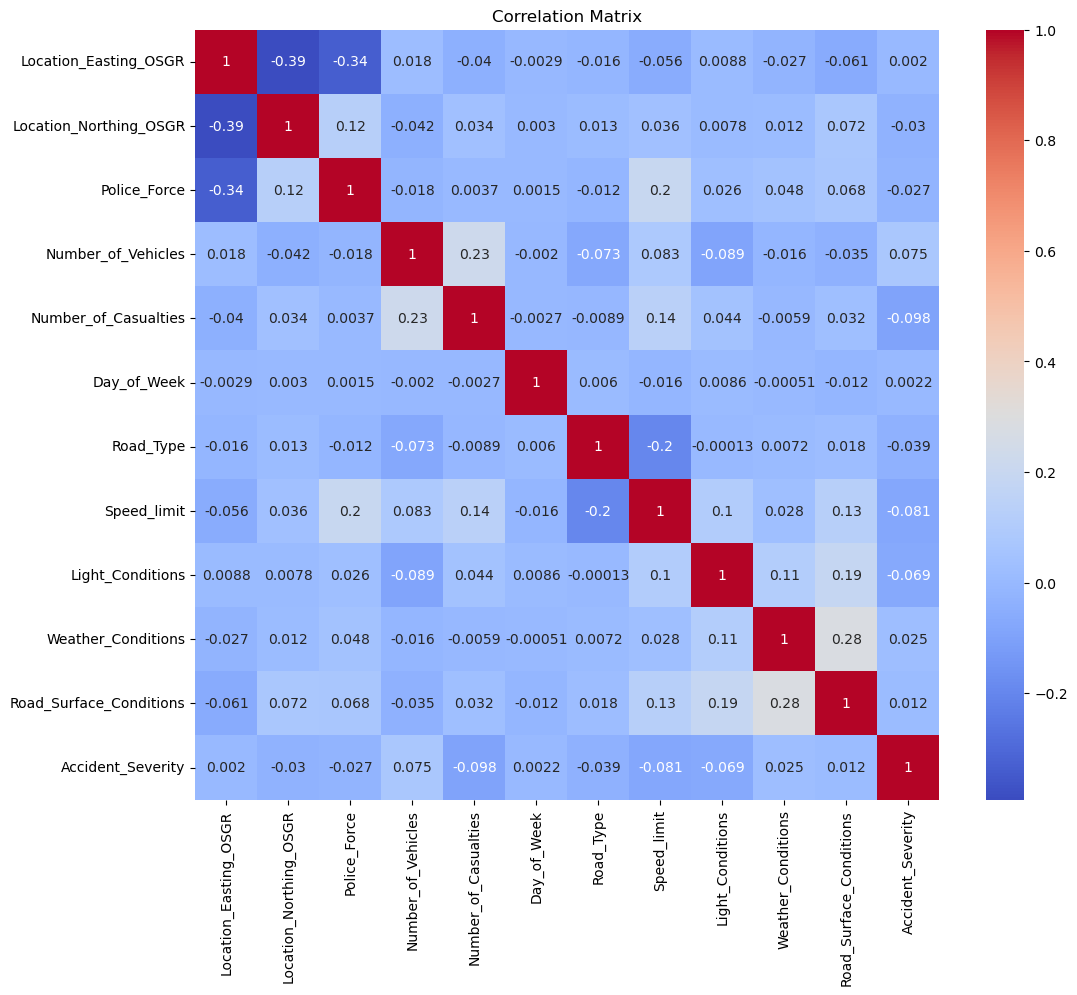

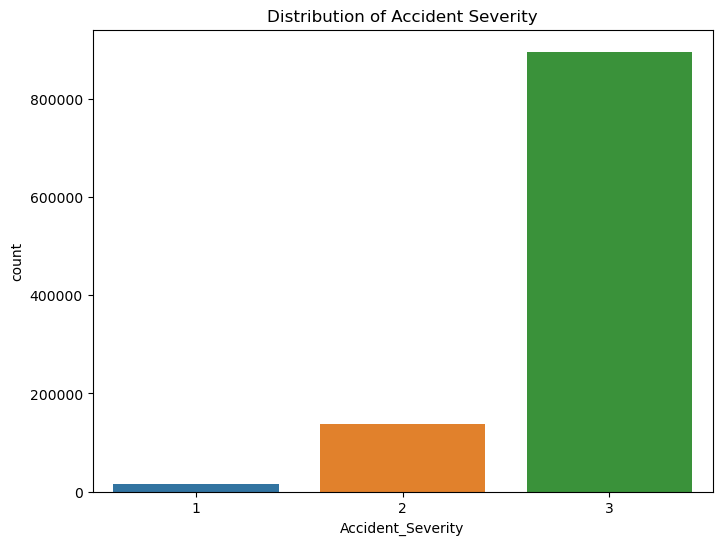

KeyboardInterrupt: 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /Accidents0514.csv')

# Display the first few rows of the dataset
print(data.head())

# Handle missing values for numerical features
numerical_features = ['Location_Easting_OSGR', 'Location_Northing_OSGR']
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Handle missing values for categorical features
# Replace missing values in all categorical columns with 'Unknown'
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Define features and target variable
features = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Police_Force', 
            'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
            'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
            'Road_Surface_Conditions']
target = 'Accident_Severity'

X = data[features]
y = label_encoder.fit_transform(data[target].astype(str))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Accident Severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=data)
plt.title('Distribution of Accident Severity')
plt.show()

# Pairplot of features
sns.pairplot(data[features + [target]], hue='Accident_Severity')
plt.title('Pairplot of Features')
plt.show()

# Group by Day_of_Week and Speed_limit, calculate mean Number_of_Casualties
casualties_by_day_speed = data.groupby(['Day_of_Week', 'Speed_limit'])['Number_of_Casualties'].mean().reset_index()

# Sort Day_of_Week by natural order (Monday=0, ..., Sunday=6)
casualties_by_day_speed['Day_of_Week'] = casualties_by_day_speed['Day_of_Week'].astype(int)
casualties_by_day_speed['Day_of_Week'] = pd.Categorical(casualties_by_day_speed['Day_of_Week'], categories=[0, 1, 2, 3, 4, 5, 6], ordered=True)
casualties_by_day_speed.sort_values('Day_of_Week', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Day_of_Week', y='Number_of_Casualties', hue='Speed_limit', data=casualties_by_day_speed, palette='viridis')
plt.title('Average Number of Casualties by Day of Week and Speed Limit')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Casualties')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Speed Limit')
plt.show()

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
